## Predicción del precio medio del aguacate usando técnicas de modelado de series temporales.

### Tabla de contenidos:
- [Importacion de librerias y otro codigo util](#importacion-de-librerias-y-otro-codigo-util)
- [Analisis exploratorio de los datos](#analisis-exploratorio-de-los-datos)
    - [Lectura y carga del dataset](#lectura-y-carga-del-dataset)
    - [Visualizacion de las variables](#visualizacion-de-las-variables)
    - [Visualizacion de la serie temporal](#visualizacion-de-la-serie-temporal)
- [Aplicamos **ARIMA**](#aplicamos-arima)
    - [¿Tiene tendencia o es estacionaria? --> Parametro ``d``](#tiene-tendencia-o-es-estacionaria----parametro-d)
    - [Parametros ``p`` y ``q`` --> **auto_arima**](#parametros-p-y-q----auto_arima)
    - [Modelizacion](#modelizacion)
    - [Visualizacion del modelo entrenado](#visualizacion-del-modelo-entrenado)
    - [Visualizacion de las predicciones](#visualizacion-de-las-predicciones)
    - [Predicciones](#predicciones)
- [Aplicamos **NeuralProphet**](#aplicamos-neuralprophet)

DESCRIPCIÓN DE LAS VARIABLES:

- ``Date`` :The date of the observation

- ``AveragePrice`` : the average price of a single avocado

- ``Total Volume`` : Total number of avocados sold

- ``4046`` : Total number of avocados with PLU 4046 sold

- ``4225`` : Total number of avocados with PLU 4225 sold

- ``4770`` : Total number of avocados with PLU 4770 sold

- ``Total Bags`` : Total number of bags

- ``Small Bags`` : Total number of small bags

- ``Large Bags`` : Total number of large bags

- ``XLarge Bags`` : Extra Large Bags

- ``type`` : conventional or organic

- ``year`` : year of the date

- ``region`` : the city or region of the observation

### Importacion de librerias y otro codigo util

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ARIMA
from statsmodels.tsa.stattools import adfuller 
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
# NeuralProphet
from neuralprophet import NeuralProphet

In [2]:
green_palette = sns.color_palette('Greens')

### Analisis exploratorio de los datos

#### Lectura y carga del dataset

In [4]:
avocado = pd.read_csv(r'./data/avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
avocado.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
avocado['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [8]:
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [9]:
# visualizacion de los valores nulos
avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
# visualizacion de los valores duplicados
avocado.duplicated().sum()

0

#### Visualizacion de las variables

In [11]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

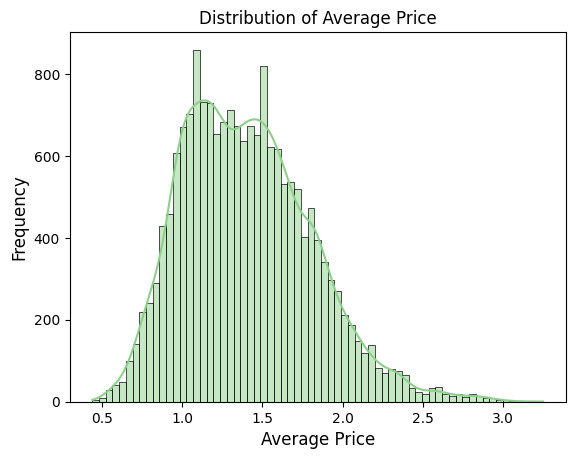

In [12]:
#Visualizo la distribución de la variable 'AveragePrice'

sns.histplot(avocado['AveragePrice'], kde=True, color=green_palette[2])
plt.title('Distribution of Average Price', fontsize=12)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12);

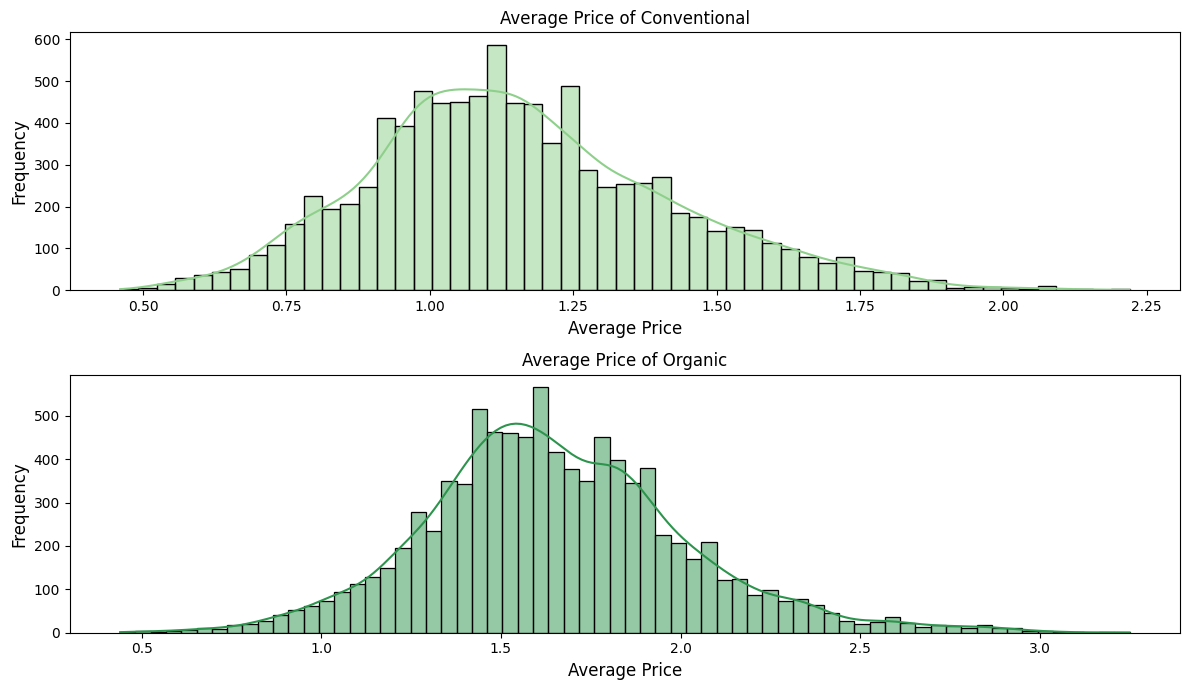

In [13]:
#Visualizo la distribución de la variable 'AveragePrice' por cada tipo de aguacate

avocado_conv = avocado[avocado["type"] == "conventional"]
avocado_org = avocado[avocado["type"] == "organic"]

# Crear figura y ejes para los subplots
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7))
# Histograma para 'conventional'
sns.histplot(avocado_conv['AveragePrice'], kde=True, color=green_palette[2], ax=ax1)
ax1.set_title('Average Price of Conventional', fontsize=12)
ax1.set_xlabel('Average Price', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
# Histograma para 'organic'
sns.histplot(avocado_org['AveragePrice'], kde=True, color=green_palette[4], ax=ax2)
ax2.set_title('Average Price of Organic', fontsize=12)
ax2.set_xlabel('Average Price', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
# Ajustar el espacio entre subplots
plt.tight_layout()
# Mostrar la figura
plt.show()

WARNING - (py.warnings._showwarnmsg) - C:\Users\kina5\AppData\Local\Temp\ipykernel_19256\1709994373.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x="type", y="AveragePrice",data=avocado, hue='type', palette=green_palette)



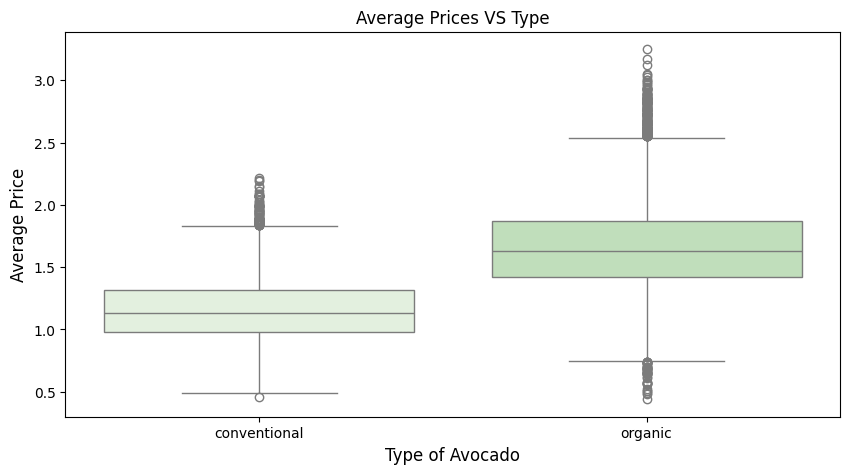

In [14]:
# comparacion de los precios por tipo de aguacate
f,ax = plt.subplots(figsize = (10,5))
sns.boxplot(x="type", y="AveragePrice",data=avocado, hue='type', palette=green_palette)
plt.title("Average Prices VS Type",fontsize = 12)
plt.xlabel('Type of Avocado',fontsize = 12)
plt.ylabel('Average Price',fontsize = 12);

#### Visualizacion de la serie temporal

In [17]:
# Nos aseguramos de que la columna 'Date' esté en formato datetime
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado_conv['Date'] = pd.to_datetime(avocado['Date'])
avocado_org['Date'] = pd.to_datetime(avocado['Date'])

WARNING - (py.warnings._showwarnmsg) - C:\Users\kina5\AppData\Local\Temp\ipykernel_19256\3565285032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_conv['Date'] = pd.to_datetime(avocado['Date'])

WARNING - (py.warnings._showwarnmsg) - C:\Users\kina5\AppData\Local\Temp\ipykernel_19256\3565285032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_org['Date'] = pd.to_datetime(avocado['Date'])



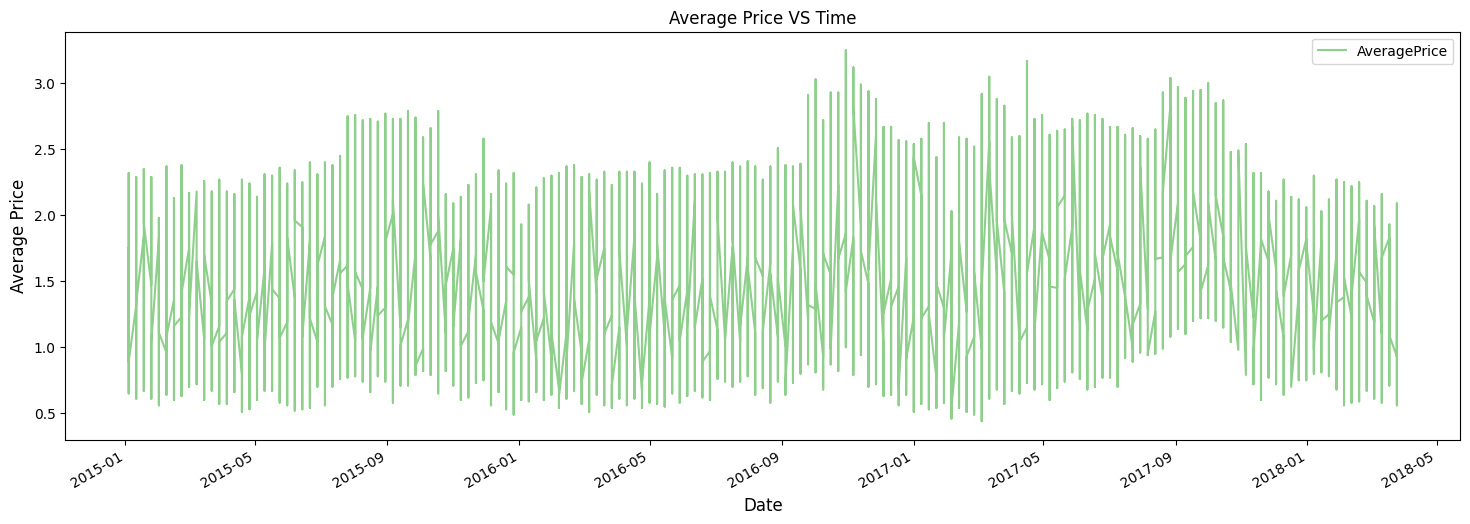

In [25]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
avocado.set_index('Date').plot(y='AveragePrice', ax=ax, color=green_palette[2])
plt.title('Average Price VS Time', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12);

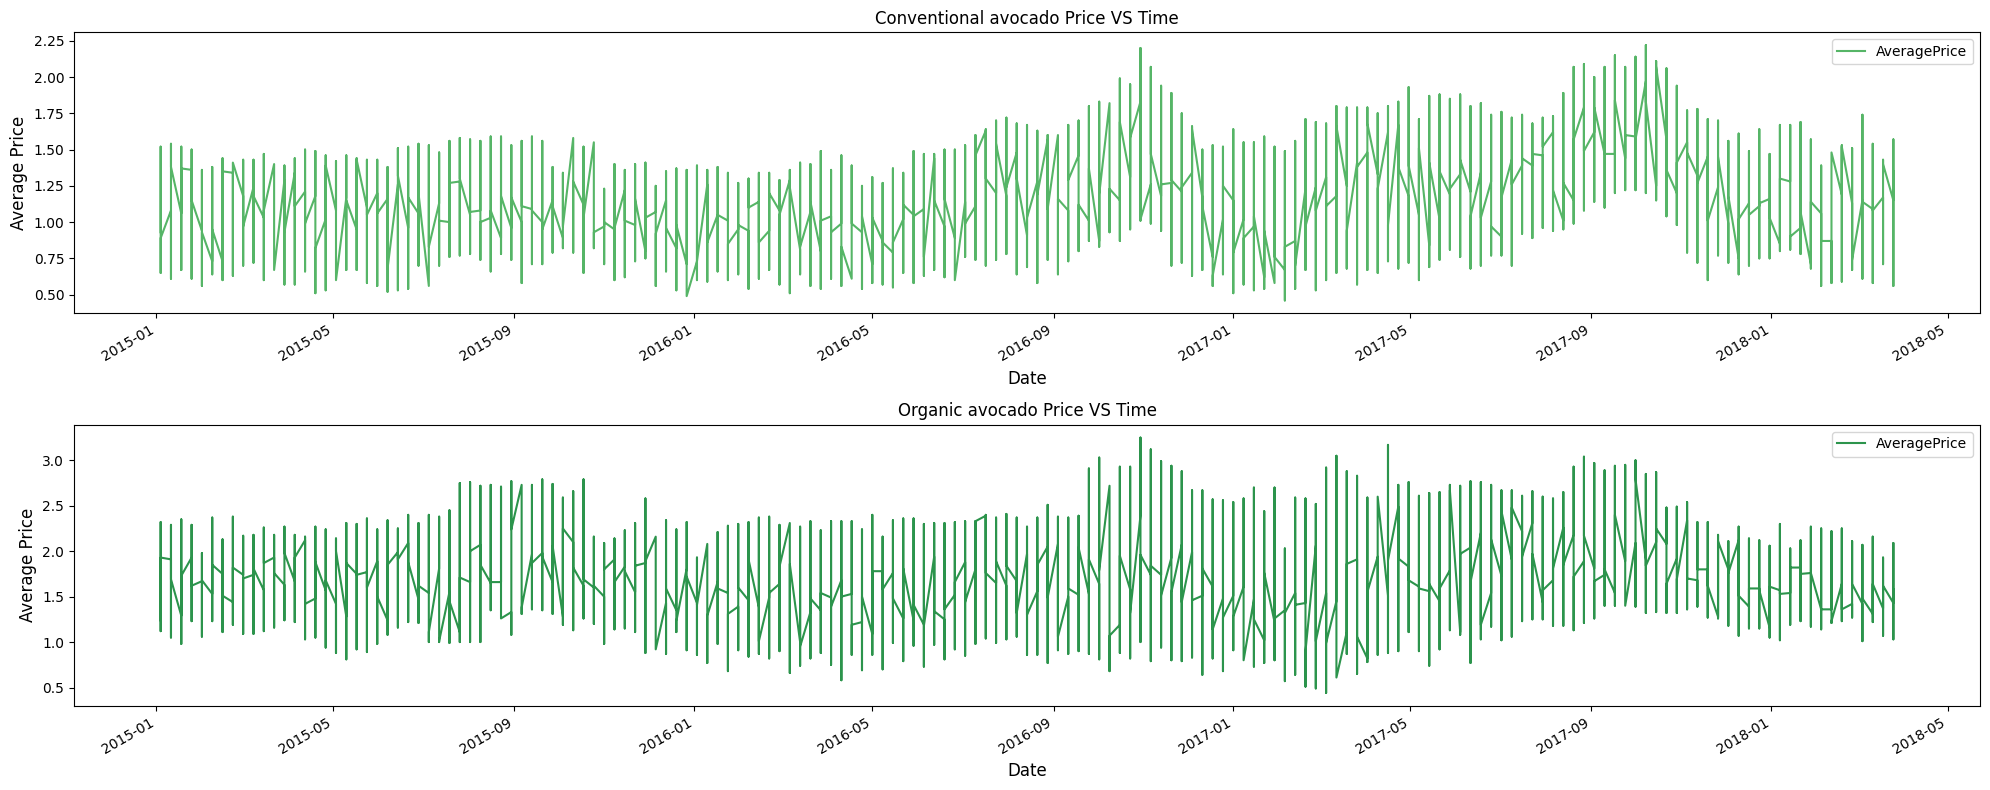

In [21]:
# visualizacion de la serie temporal por cada tipo de aguacate

# Crear figura y ejes para los subplots
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))
# Serie temporal para 'conventional'
avocado_conv.set_index('Date').plot(y='AveragePrice', ax=ax1, color=green_palette[3])
ax1.set_title('Conventional avocado Price VS Time', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Average Price', fontsize=12)
# Serie temporal para 'organic'
avocado_org.set_index('Date').plot(y='AveragePrice', ax=ax2, color=green_palette[4])
ax2.set_title('Organic avocado Price VS Time', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Average Price', fontsize=12)
# Ajustar el espacio entre subplots
plt.tight_layout()
# Mostrar la figura
plt.show()

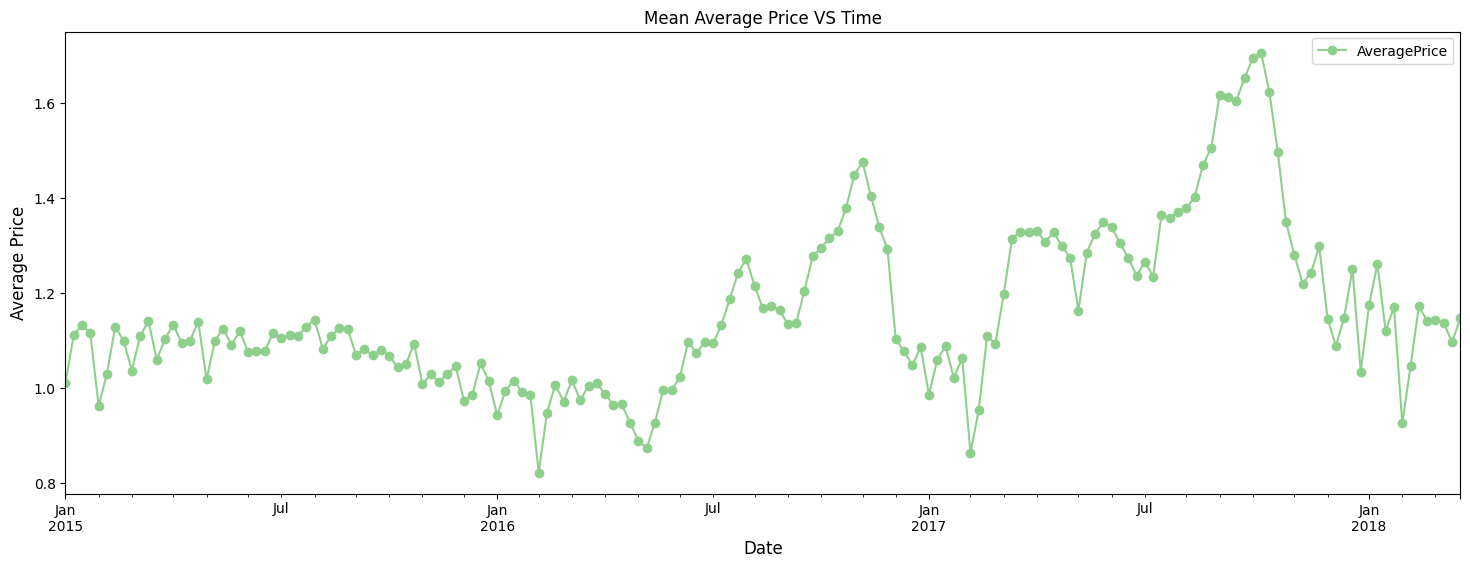

In [27]:
# promedio de 'AveragePrice' para cada fecha
fig, ax = plt.subplots(1,1, figsize=(18,6))
avocado_conv.groupby('Date')['AveragePrice'].mean().reset_index().set_index('Date').plot(ax=ax, marker = 'o', linestyle = '-', color = green_palette[2])
plt.title('Mean Average Price (Conventional) VS Time', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12);

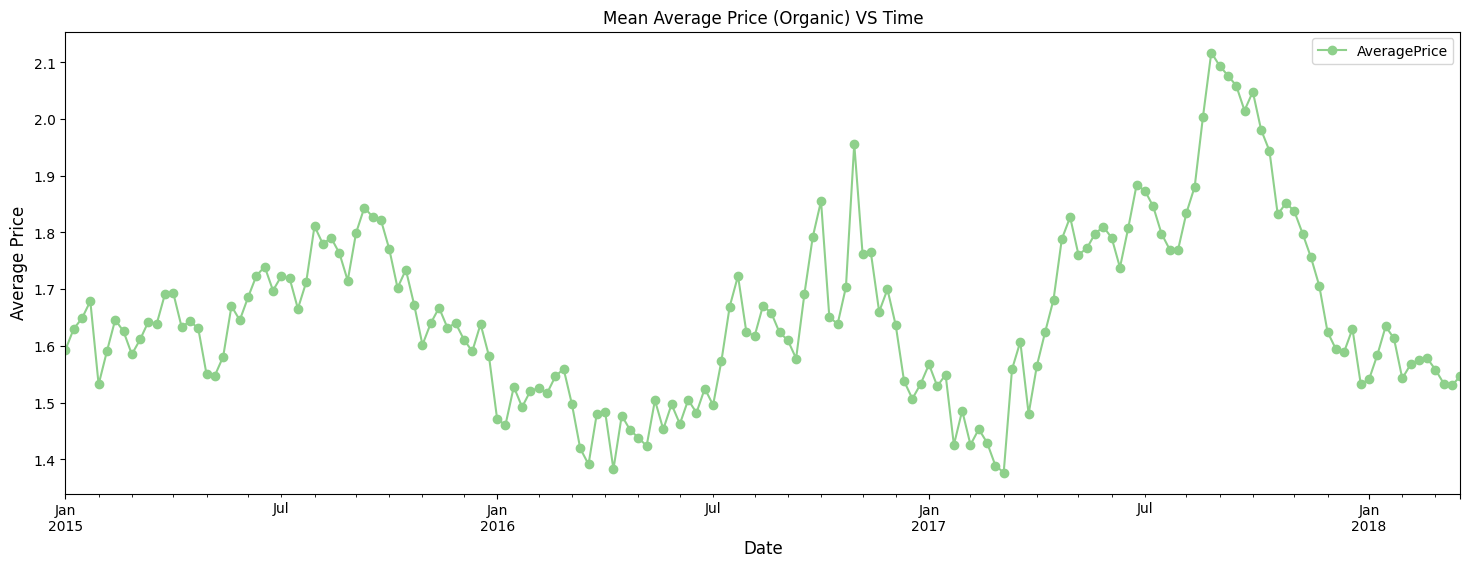

In [28]:
# promedio de 'AveragePrice' para cada fecha
fig, ax = plt.subplots(1,1, figsize=(18,6))
avocado_org.groupby('Date')['AveragePrice'].mean().reset_index().set_index('Date').plot(ax=ax, marker = 'o', linestyle = '-', color = green_palette[2])
plt.title('Mean Average Price (Organic) VS Time', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12);

OBSERVACIONES

- Los precios son mayores de julio a septiembre-octubre.
- En 2018 los precios fueron mayores que en los años anteriores.

---
### Aplicamos **ARIMA**

Tenemos que establecer los valores p, d, q:

- Parámetro p - AUTORREGRESIVO (**AR**): es el orden del componente autorregresivo del modelo. Representa el número de rezagos (lags) de la serie temporal que se usan en el modelo.
- Parámetro d - DIFERENCIACIÓN (**I**): es el número de veces que se debe diferenciar la serie temporal para que se vuelva estacionaria. 
- Parámetro q - MEDIA MÓVIL (**MA**): Representa el número de rezagos (lags) de los errores de predicción que se usan en el modelo.

**PASOS A SEGUIR**:
#### ¿Tiene tendencia o es estacionaria? --> Parametro ``d``

In [19]:
# Aplicamos adfuller para establecer el parámetro
print(f"p-valor diferenciación orden cero: {adfuller(avocado['AveragePrice'])[1]}") # devuelve un estadistico y un pvalor, y queremos el pvalor[1]
print(f"p-valor diferenciación orden uno: {adfuller(avocado['AveragePrice'].diff().dropna())[1]}")
print(f"p-valor diferenciación orden dos: {adfuller(avocado['AveragePrice'].diff().diff().dropna())[1]}")

p-valor diferenciación orden cero: 5.7160690959319934e-11
p-valor diferenciación orden uno: 0.0
p-valor diferenciación orden dos: 0.0


Todos son menores de 0.05, por lo que la consideramos la serie **estacionaria**.

De aquellos pvalor que pasan el 0.05, me quedo con el que tenga menos diferenciación: La diferenciación de orden 0 (sin diferenciar).

Por lo tanto, ``d=0``.

#### Parametros ``p`` y ``q`` --> **auto_arima**

Aplicamos auto_arima para que nos de el mejor modelo:

In [27]:
# aplicamos auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(avocado['AveragePrice'], start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=0,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-13579.018, Time=1.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65665.108, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=44110.765, Time=1.47 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-13719.457, Time=4.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.95 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-13717.500, Time=10.35 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-13709.139, Time=4.63 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-13712.561, Time=4.50 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=3.00 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-13727.636, Time=10.40 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-13732.748, Time=12.90 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-13713.765, Time=7.39 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=26.44 sec
 ARIMA(4,0,3)(0,0,0)[0]        

Vamos a tomar finalmente modelo $\text{ARIMA}(p=3,\,d=0,\,q=3)$. Ya tenemos los parámetros, ahora vamos a ajustar el modelo:

#### Modelizacion

In [20]:
# Ajustamos modelo a datos
model = ARIMA(avocado['AveragePrice'].values, order=(3,0,3))
model_fit = model.fit()
# Resumen del entrenamiento
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                18249
Model:                 ARIMA(3, 0, 3)   Log Likelihood                7022.721
Date:                Wed, 21 Aug 2024   AIC                         -14029.442
Time:                        09:45:55   BIC                         -13966.947
Sample:                             0   HQIC                        -14008.904
                              - 18249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4062      0.023     62.032      0.000       1.362       1.451
ar.L1         -0.0495      0.052     -0.944      0.345      -0.152       0.053
ar.L2          0.5740      0.048     11.886      0.0

#### Visualizacion del modelo entrenado

`plot_diagnostics` nos muestra (de izquierda a derecha y de arriba hacia abajo) la gráfica real del ruido, el histograma real y estimado, el gráfico de cuantiles y un correlograma:

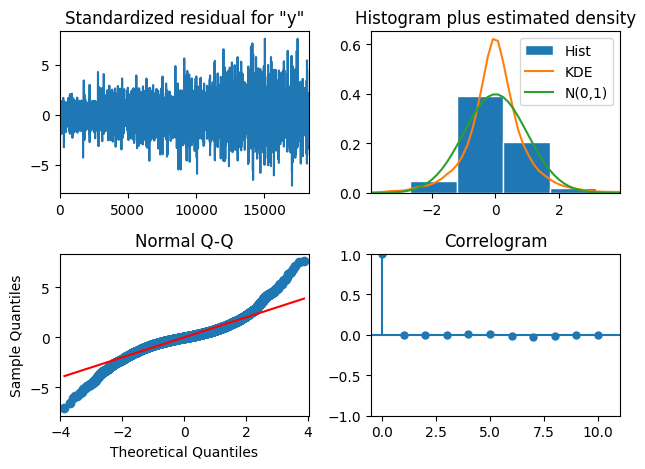

In [80]:
model_fit.plot_diagnostics()
plt.tight_layout()
plt.show()

El residuo ha variado mucho, pero con Arima es lo mejor que podemos sacar.

#### Visualizacion de las predicciones

Para comprobar la calidad del ajuste del modelo entrenado a los datos de la serie temporal proporcionados, podemos usar el método `predict` del modelo ARIMA entrenado para trazar los valores reales y pronosticados uno encima del otro. Este gráfico lineal se calcula a partir de los pesos aprendidos y entrenados por el modelo. Verifiquemos qué tan bien funciona la predicción en función de los coeficientes aprendidos:

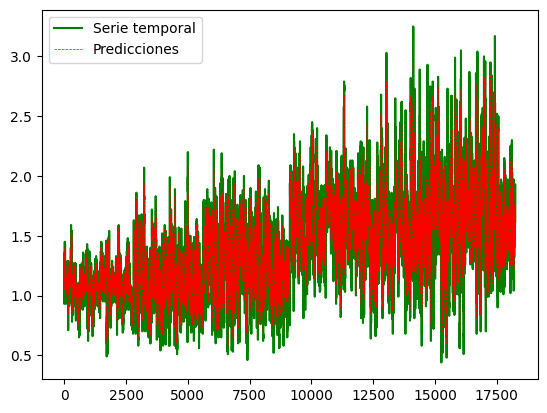

In [82]:
p = 3 # Coeficientes de autoregresión
d = 0 # Orden de diferenciación
q = 3 # Ajuste media móvil
# Tomamos predicciones
preds = model_fit.predict()
# Creamos figura
fig, ax = plt.subplots()
ax.plot(range(len(avocado)), avocado['AveragePrice'].values, 'g-')
ax.plot(range(d,len(avocado)), preds[d:], 'r--',linewidth=0.5)
plt.legend(['Serie temporal', 'Predicciones'])
plt.show()

#### Predicciones

In [14]:
# Hacemos predicciones
model_fit.forecast() # Al día siguiente, va a haber ese precio medio
model_fit.forecast(2) # En los siguientes 2 días

array([1.67494552, 1.68561834])

### Aplicamos **NeuralProphet**

NeuralProphet es una biblioteca de modelado de series temporales desarrollada por Facebook. Es una extensión de la popular librería Prophet, que Facebook creó para la predicción de series temporales, pero NeuralProphet introduce capacidades adicionales mediante el uso de redes neuronales.

In [32]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Filtramos dataframe

Para predecir los precios de los aguacates en la serie temporal, hay que dividirlos en sus 2 tipos: Tipo de aguacate ``convencional``y ``orgánico``:

Vamos a quedarnos solo con las columnas ``Date`` y ``AveragePrice``:

In [71]:
col = ['Date', 'AveragePrice']
avocado_conv_filt = avocado_conv[col].copy()
avocado_org_filt = avocado_org[col].copy()

##### Renombramos columnas y cambiamos formato de fechas

In [76]:
# Renombramos columnas (deben llamarse exactamente así)
avocado_conv_filt.rename(columns = {'Date':'ds', 'AveragePrice':'y'}, inplace = True)
avocado_org_filt.rename(columns = {'Date':'ds', 'AveragePrice':'y'}, inplace = True)
# Cambiamos formato a fechas
avocado_conv_filt['ds'] = pd.DatetimeIndex(avocado_conv_filt['ds'])
avocado_org_filt['ds'] = pd.DatetimeIndex(avocado_org_filt['ds'])
# Mostramos
print('CONVENTIONAL AVOCADO')
avocado_conv_filt.info()
print('ORGANIC AVOCADO')
avocado_org_filt.info()

CONVENTIONAL AVOCADO
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9126 entries, 0 to 9125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9126 non-null   datetime64[ns]
 1   y       9126 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 213.9 KB
ORGANIC AVOCADO
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9123 entries, 9126 to 18248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9123 non-null   datetime64[ns]
 1   y       9123 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 213.8 KB


##### Visualizamos el dataset

In [51]:
avocado_conv_filt.head()

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


In [78]:
avocado_org_filt.head()

,ds,y
9126,2015-12-27,1.83
9127,2015-12-20,1.89
9128,2015-12-13,1.85
9129,2015-12-06,1.84
9130,2015-11-29,1.94


In [79]:
# Eliminar duplicados de la columna 'ds', porque sino más adelante da error
avocado_conv_filt.drop_duplicates('ds', inplace=True)
avocado_org_filt.drop_duplicates('ds', inplace=True)

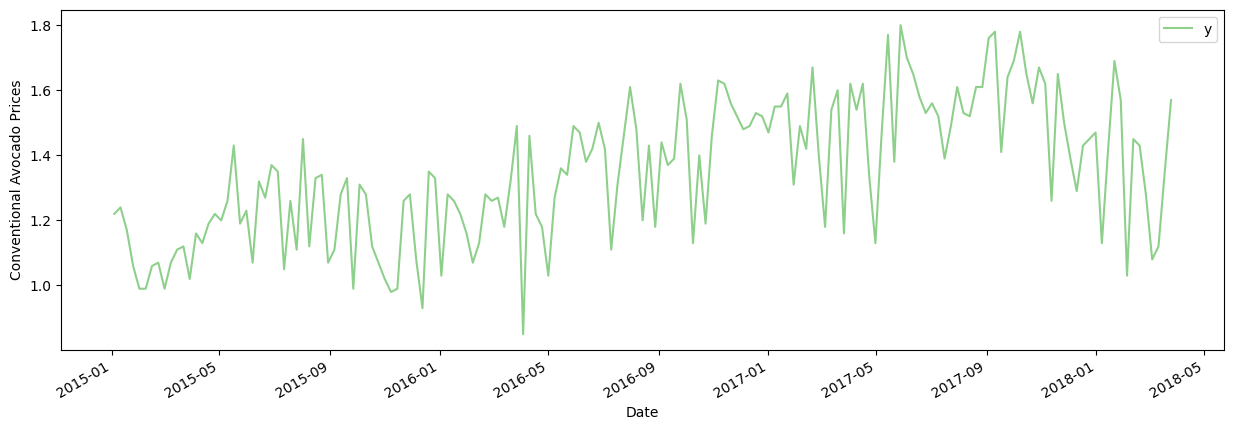

In [67]:
# graficar linea de tiempo sin duplicados (conventional avocado)
ax = avocado_conv_filt.set_index('ds').plot(figsize=(15, 5),color=green_palette[2])
ax.set_ylabel('Conventional Avocado Prices')
ax.set_xlabel('Date')
plt.show()

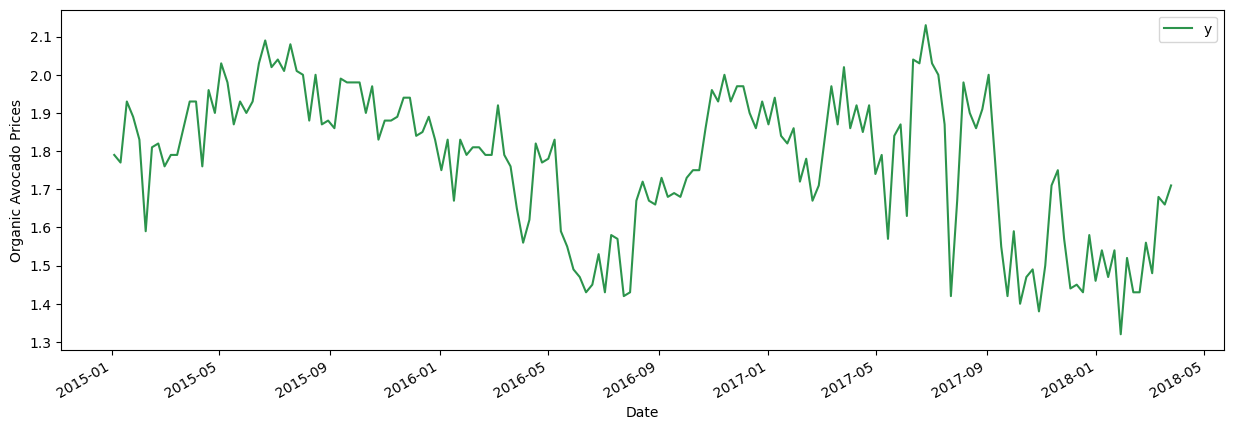

In [80]:
# graficar linea de tiempo sin duplicados (organic avocado)
ax = avocado_org_filt.set_index('ds').plot(figsize=(15, 5),color=green_palette[4])
ax.set_ylabel('Organic Avocado Prices')
ax.set_xlabel('Date')
plt.show()

##### Entrenamos modelo NeuralProphet

- Conventional avocado:

In [82]:
# Instanciamos clase
m_conv = NeuralProphet()
# Partimos datos especificando unidad mínima de tiempo
df_train, df_val = m_conv.split_df(avocado_conv_filt, freq='-1W-SUN', valid_p = 0.2) # Especifico la frecuencia de 1 semana (los datos en el df son semanales)
# Entrenamos modelo
metrics_conv = m_conv.fit(df_train, freq='-1W-SUN', validation_df=df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-SUN corresponds to 97.633% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - -1W-SUN
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-SUN corresponds to 97.794% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - -1W-SUN
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batc

Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

- Organic avocado:

In [83]:
# Instanciamos clase
m_org = NeuralProphet()
# Partimos datos especificando unidad mínima de tiempo
df_train, df_val = m_org.split_df(avocado_org_filt, freq='-1W-SUN', valid_p = 0.2) # Especifico la frecuencia de 1 semana (los datos en el df son semanales)
# Entrenamos modelo
metrics_org = m_org.fit(df_train, freq='-1W-SUN', validation_df=df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-SUN corresponds to 97.633% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - -1W-SUN
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-SUN corresponds to 97.794% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - -1W-SUN
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonal

Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [84]:
metrics_conv.head()

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,1.004509,1.103825,1.048079,0.0,0,0.950915,1.147535,0.824300,0.0
1,0.951082,1.047895,0.985509,0.0,1,0.869174,1.063257,0.749792,0.0
2,0.895020,0.990436,0.919567,0.0,2,0.815147,1.013905,0.701415,0.0
3,0.838395,0.931678,0.852345,0.0,3,0.766663,0.958606,0.654012,0.0
4,0.779395,0.870561,0.782642,0.0,4,0.687785,0.863833,0.575628,0.0


In [85]:
metrics_org.head()

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,0.491098,0.549009,0.573816,0.0,0,0.476960,0.587097,0.442849,0.0
1,0.464335,0.520941,0.535550,0.0,1,0.459623,0.564263,0.426627,0.0
2,0.439640,0.495000,0.500458,0.0,2,0.424094,0.523402,0.384829,0.0
3,0.417174,0.470984,0.468624,0.0,3,0.394954,0.489862,0.353045,0.0
4,0.391650,0.444231,0.433121,0.0,4,0.369739,0.455123,0.322674,0.0


Todas las métricas (MAE, RMSE, Loss) están disminuyendo en el conjunto de validación y entrenamiento a medida que aumentan las épocas. Esto indica que el modelo está aprendiendo y mejorando su capacidad de predicción con el tiempo:

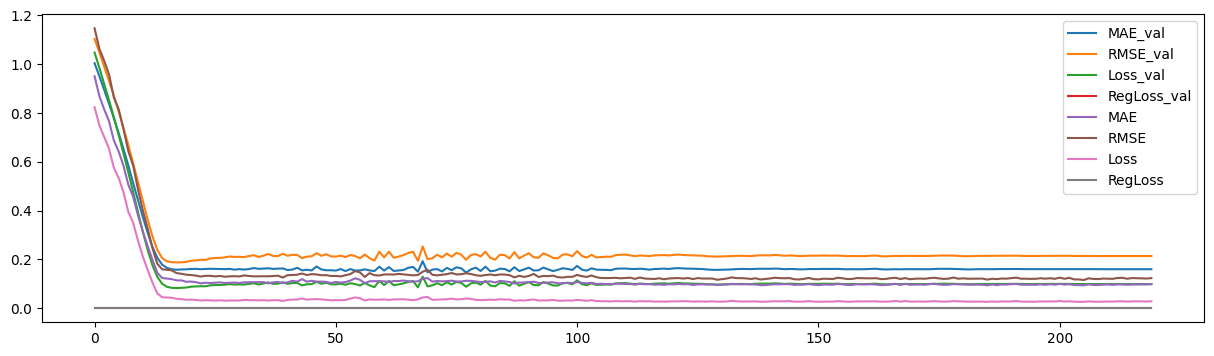

In [86]:
metrics_conv.drop(['epoch'], axis=1).plot(figsize=(15,4));

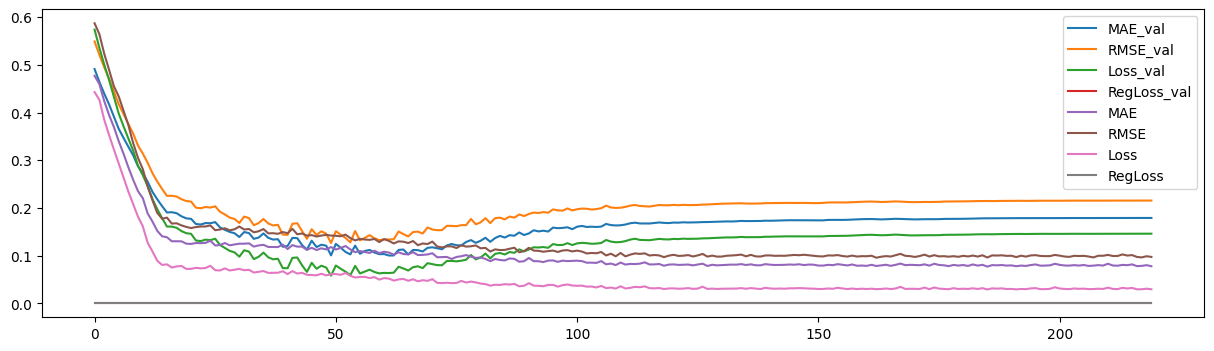

In [87]:
metrics_org.drop(['epoch'], axis=1).plot(figsize=(15,4));

##### Realizamos predicciones

- Conventional avocado:

In [89]:
future_conv = m_conv.make_future_dataframe(avocado_conv_filt, periods=24, n_historic_predictions=len(avocado_conv_filt))
forecast_conv = m_conv.predict(future_conv)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-SUN corresponds to 97.633% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - -1W-SUN
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-SUN corresponds to 97.633% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - -1W-SUN
INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-SUN corresponds to 97.633% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - -1W-SUN


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [90]:
#añadir columna de error
forecast_conv['residual1']= forecast_conv['y']-forecast_conv['yhat1']

In [91]:
forecast_conv.head()

,ds,y,yhat1,trend,season_yearly,residual1
0,2015-12-27,1.33,1.157907,1.202412,-0.044505,0.172093
1,2015-12-20,1.35,1.135125,1.197563,-0.062438,0.214875
2,2015-12-13,0.93,1.124995,1.192715,-0.067720,-0.194995
3,2015-12-06,1.08,1.127693,1.187866,-0.060174,-0.047693
4,2015-11-29,1.28,1.137952,1.183018,-0.045066,0.142048


- Organic avocado:

In [92]:
future_org = m_org.make_future_dataframe(avocado_org_filt, periods=24, n_historic_predictions=len(avocado_org_filt))
forecast_org = m_org.predict(future_org)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-SUN corresponds to 97.633% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - -1W-SUN
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-SUN corresponds to 97.633% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - -1W-SUN
INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-SUN corresponds to 97.633% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - -1W-SUN


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [93]:
#añadir columna de error
forecast_org['residual1']= forecast_org['y']-forecast_org['yhat1']

In [94]:
forecast_org.head()

,ds,y,yhat1,trend,season_yearly,residual1
0,2015-12-27,1.83,1.822678,1.854134,-0.031456,0.007322
1,2015-12-20,1.89,1.831349,1.860555,-0.029207,0.058651
2,2015-12-13,1.85,1.842046,1.866977,-0.024931,0.007954
3,2015-12-06,1.84,1.860869,1.873399,-0.012529,-0.020869
4,2015-11-29,1.94,1.889384,1.879820,0.009564,0.050616


##### Graficamos predicciones

- Conventional avocado:

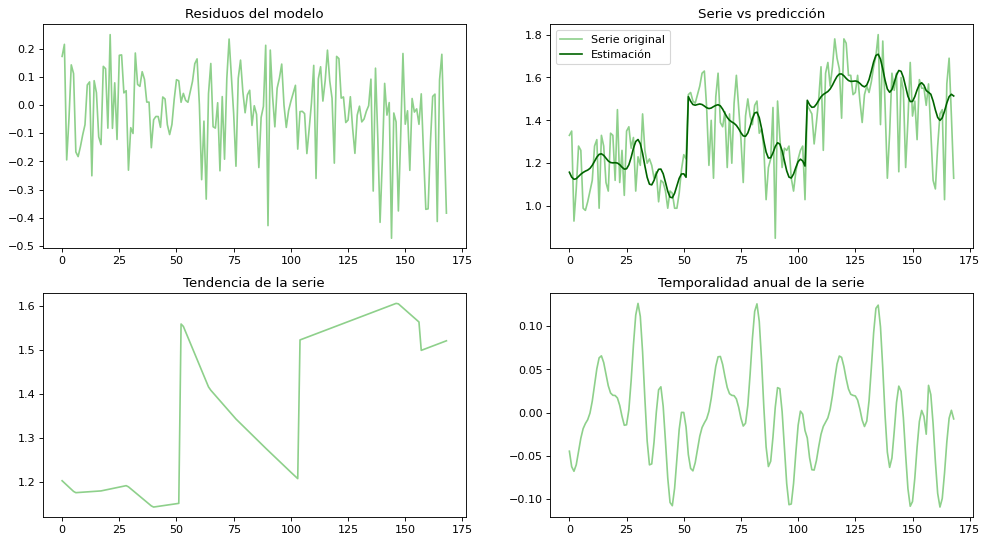

In [95]:
# Creamos gráfico
f = plt.figure(figsize=(15, 8), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(221)
ax1.set_title('Residuos del modelo')
ax1.plot(forecast_conv['residual1'], color=green_palette[2])
# Preparamos segundo componente
ax2 = f.add_subplot(222)
ax2.set_title('Serie vs predicción')
ax2.plot(forecast_conv['y'],color=green_palette[2])
ax2.plot(forecast_conv['yhat1'], color='darkgreen') # Línea verde oscura para estimación
ax2.legend(['Serie original', 'Estimación'])
# Preparamos tercer componente
ax3 = f.add_subplot(223)
ax3.set_title('Tendencia de la serie')
ax3.plot(forecast_conv['trend'],color=green_palette[2])
# Preparamos cuarto componente
ax4 = f.add_subplot(224)
ax4.set_title('Temporalidad anual de la serie')
ax4.plot(forecast_conv['season_yearly'],color=green_palette[2])

- Organic avocado:

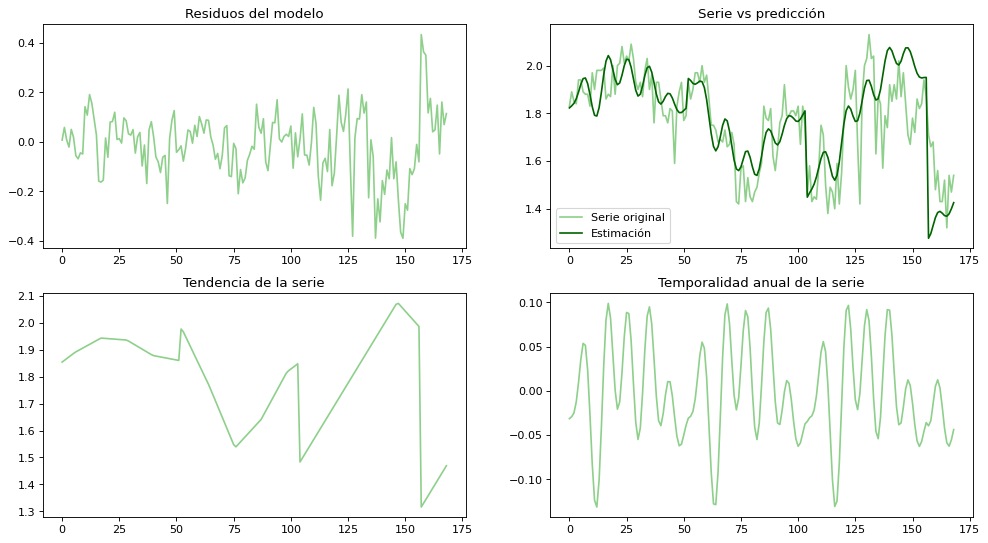

In [96]:
# Creamos gráfico
f = plt.figure(figsize=(15, 8), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(221)
ax1.set_title('Residuos del modelo')
ax1.plot(forecast_org['residual1'], color=green_palette[2])
# Preparamos segundo componente
ax2 = f.add_subplot(222)
ax2.set_title('Serie vs predicción')
ax2.plot(forecast_org['y'],color=green_palette[2])
ax2.plot(forecast_org['yhat1'], color='darkgreen') # Línea verde oscura para estimación
ax2.legend(['Serie original', 'Estimación'])
# Preparamos tercer componente
ax3 = f.add_subplot(223)
ax3.set_title('Tendencia de la serie')
ax3.plot(forecast_org['trend'],color=green_palette[2])
# Preparamos cuarto componente
ax4 = f.add_subplot(224)
ax4.set_title('Temporalidad anual de la serie')
ax4.plot(forecast_org['season_yearly'],color=green_palette[2])

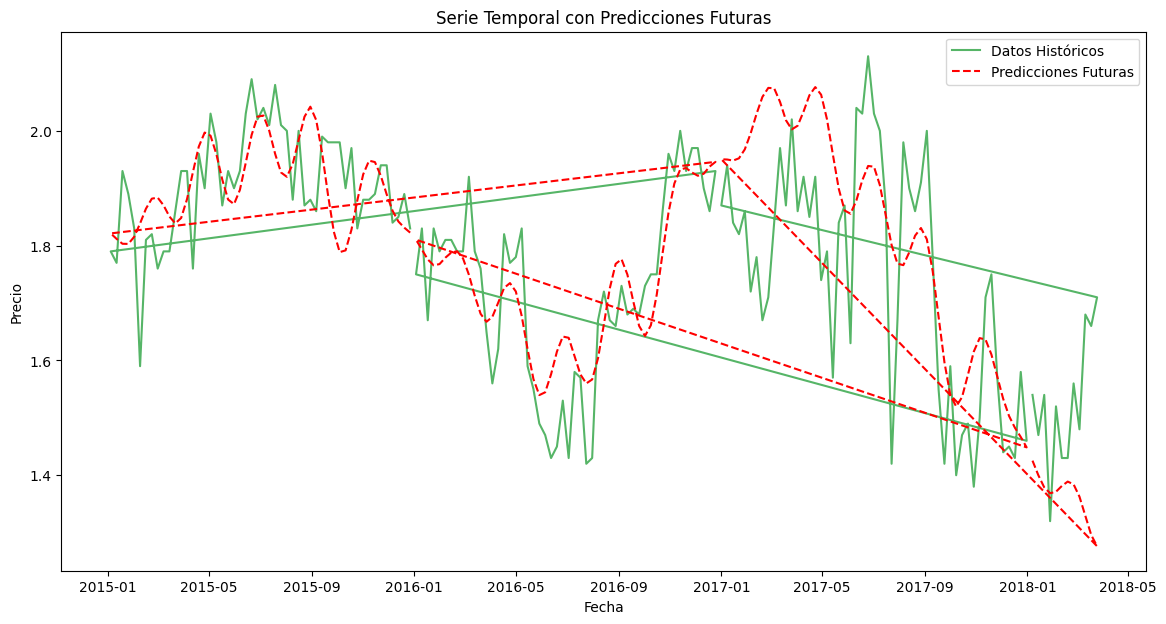

In [97]:
# # Graficar los resultados
# plt.figure(figsize=(14, 7))

# # Graficar datos históricos
# plt.plot(avocado_org_filt['ds'], avocado_org_filt['y'], label='Datos Históricos', color=green_palette[3])

# # Graficar predicciones futuras
# plt.plot(forecast_org['ds'], forecast_org['yhat1'], label='Predicciones Futuras', color='red', linestyle='--')

# # Añadir etiquetas y leyenda
# plt.xlabel('Fecha')
# plt.ylabel('Precio')
# plt.title('Serie Temporal con Predicciones Futuras')
# plt.legend()

# # Mostrar el gráfico
# plt.show()